IMPORT THE REQUIRED

In [2]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np


LOADING AND SPLITTING THE DATA

In [3]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))


Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print(x_train[0].shape)

(32, 32, 3)


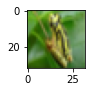

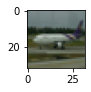

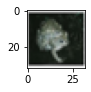

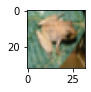

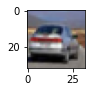

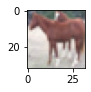

In [6]:
for i in range(232,238):
  plt.subplot(120+ 1+i)
  img= x_train[i]
  plt.imshow(img)
  plt.show()

PREPROCESSING THE DATA

In [8]:
x_train= x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train =x_train.astype('float32')
x_test= x_test.astype('float32')


x_train /=255
x_test /=255
n_classes=10


print("shape before one-hot encoding:",y_train.shape)
y_train =np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("shape after one-hot encoding:",y_train.shape)


shape before one-hot encoding: (50000, 1)
shape after one-hot encoding: (50000, 10)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten


model=Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation= 'relu', input_shape=(32,32,3)))


model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10,activation='softmax'))
#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model
model.fit(x_train,y_train,batch_size=128, epochs=10, validation_data=(x_test,y_test))



Epoch 1/10
391/391 [==============================] - 506s 1s/step - loss: 1.6361 - accuracy: 0.3969 - val_loss: 1.1769 - val_accuracy: 0.5784
Epoch 2/10
391/391 [==============================] - 499s 1s/step - loss: 1.1289 - accuracy: 0.5965 - val_loss: 0.9108 - val_accuracy: 0.6792
Epoch 3/10
391/391 [==============================] - 500s 1s/step - loss: 0.9386 - accuracy: 0.6715 - val_loss: 0.8376 - val_accuracy: 0.7089
Epoch 4/10
391/391 [==============================] - 498s 1s/step - loss: 0.8306 - accuracy: 0.7087 - val_loss: 0.7403 - val_accuracy: 0.7412
Epoch 5/10
391/391 [==============================] - 497s 1s/step - loss: 0.7417 - accuracy: 0.7409 - val_loss: 0.7073 - val_accuracy: 0.7526
Epoch 6/10
391/391 [==============================] - 497s 1s/step - loss: 0.6768 - accuracy: 0.7625 - val_loss: 0.7026 - val_accuracy: 0.7532
Epoch 7/10
391/391 [==============================] - 496s 1s/step - loss: 0.6263 - accuracy: 0.7802 - val_loss: 0.6627 - val_accuracy: 0.7732

In [13]:
classes=range(0,10)

names=['airplane',
       'automobile',
       'bird',
       'cat',
       'deer',
       'dog',
       'frog',
       'horse',
       'ship',
       'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels=dict(zip(classes,names))

#generate batch of 9 images to predict 
batch= x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)

#make predictions
predictions =model.predict(batch,verbose=1)



1/1 [==============================] - 0s 137ms/step


In [14]:
print(predictions)

[[2.88523966e-04 1.79216859e-05 1.36671746e-02 6.01068418e-03
  4.56801116e-01 4.72588949e-02 4.70196159e-04 4.75174457e-01
  1.25665945e-04 1.85433397e-04]
 [1.50299328e-03 1.02003425e-04 2.18937341e-02 3.38621102e-02
  1.81669056e-01 2.20805585e-01 2.77258214e-02 5.10810852e-01
  1.78265327e-04 1.44968159e-03]
 [6.92589310e-05 5.80480031e-04 4.75051673e-03 1.03410538e-02
  1.41927274e-04 1.88092217e-02 9.63242054e-01 1.05313433e-03
  5.64863803e-05 9.55923751e-04]
 [4.96850698e-05 2.00152463e-05 2.36707460e-03 8.79100084e-01
  1.10063395e-02 1.88391376e-02 8.69889036e-02 9.88267246e-04
  1.09019973e-04 5.31546480e-04]
 [1.18257276e-06 9.98609900e-01 5.36293544e-11 2.47120172e-11
  1.94183038e-11 1.01477453e-12 1.06632888e-11 1.39813838e-11
  2.12086820e-06 1.38680206e-03]
 [4.05873095e-07 9.99936819e-01 6.48968168e-09 7.83551979e-09
  2.13489920e-10 5.11809276e-11 3.69520442e-10 2.24731483e-11
  2.20500897e-05 4.07263542e-05]
 [6.97740689e-02 4.12739813e-02 1.51971012e-01 1.70094043e

In [15]:
for image in predictions:
  print(np.sum(image))

1.0000001
1.0000001
1.0000001
1.0
1.0
1.0
1.0
0.99999994
1.0000001


In [16]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[7 7 6 3 1 1 5 6 8]


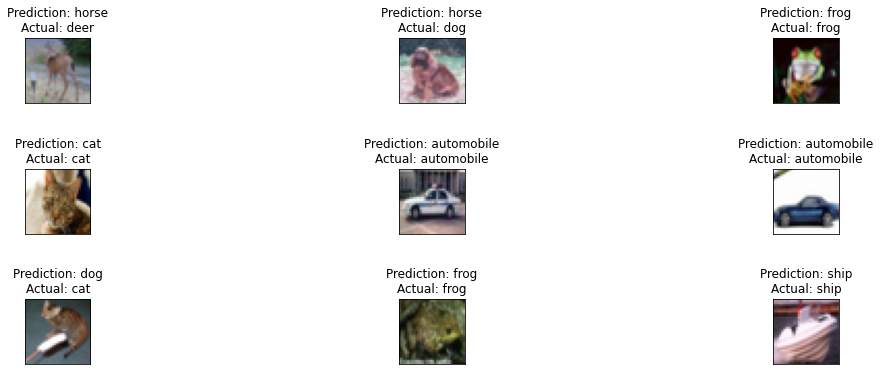

In [21]:
flg, axs=plt.subplots(3, 3, figsize=(19,6))
flg.subplots_adjust(hspace=1)
axs =axs.flatten()

for i, img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='Prediction: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plot the image
  axs[i].imshow(img)

#show the plot
plt.show()

